### 鸢尾花分类
作业1：数据集内包含3类共150条记录，每类各50个数据，每条记录都有4项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa，iris-versicolor，iris-virginica）中的哪一品种。

*要求：
1. 在鸢尾花数据集上，尽量手动编写朴素贝叶斯分类代码，完成分类实验。（可参考李航统计学习方法）
2. 在1的基础上，对鸢尾花中特征部分进行划分，分别利用1个，2个，3个，4个特征进行分类，比较不同特征对分类结果的影响，画图比较。

In [12]:
# 导入库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立高斯朴素贝叶斯分类器
clf = GaussianNB()

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

# 输出结果
print("Accuracy:", accuracy)


Accuracy: 1.0


In [22]:
# 导入库
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 加载数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义特征子集
feature_sets = [[[0], [1], [2], [3]],
                [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]],
                [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]],
                [[0, 1, 2, 3]]]
accuracies = [0, 0, 0, 0]

# 循环使用不同的特征子集进行分类
for i, features in enumerate(feature_sets):
    for j, feature in enumerate(features):
        # 提取特征子集
        X_train_fs = X_train[:, features[j]]
        X_test_fs = X_test[:, features[j]]
        
        # 建立高斯朴素贝叶斯分类器
        clf = GaussianNB()
        
        # 训练模型
        clf.fit(X_train_fs, y_train)
        
        # 预测
        y_pred = clf.predict(X_test_fs)
        
        # 计算准确率
        accuracy = accuracy_score(y_test, y_pred)
    
        # 输出结果
        print("Using {} feature(s): Accuracy = {:.2f}%".format(features[j], accuracy * 100))
        accuracies[i] += accuracy
    accuracies[i] /= len(features)
print(accuracies)

Using [0] feature(s): Accuracy = 86.67%
Using [1] feature(s): Accuracy = 56.67%
Using [2] feature(s): Accuracy = 100.00%
Using [3] feature(s): Accuracy = 100.00%
Using [0, 1] feature(s): Accuracy = 90.00%
Using [0, 2] feature(s): Accuracy = 93.33%
Using [0, 3] feature(s): Accuracy = 100.00%
Using [1, 2] feature(s): Accuracy = 100.00%
Using [1, 3] feature(s): Accuracy = 96.67%
Using [2, 3] feature(s): Accuracy = 100.00%
Using [0, 1, 2] feature(s): Accuracy = 96.67%
Using [0, 1, 3] feature(s): Accuracy = 96.67%
Using [0, 2, 3] feature(s): Accuracy = 100.00%
Using [1, 2, 3] feature(s): Accuracy = 100.00%
Using [0, 1, 2, 3] feature(s): Accuracy = 100.00%
[0.8583333333333334, 0.9666666666666667, 0.9833333333333334, 1.0]


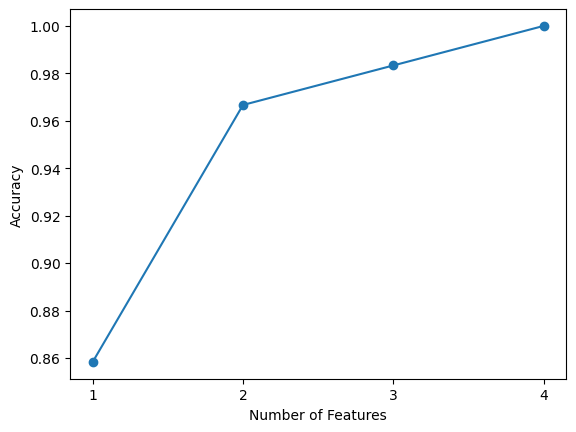

In [23]:
import matplotlib.pyplot as plt
# 绘制准确率图像
plt.plot([1, 2, 3, 4], accuracies, '-o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xticks([1, 2, 3, 4])
plt.show()

### MNIST数据分类
作业2：选用的MNIST数据集，每条记录都有28*28项特征，随机选择70%训练，30%测试。

*要求：
1. 在数据集上，利用朴素贝叶斯分类代码，完成分类实验，并画图给出不同数字的准确率，并尝试分析其原因。
2. 利用PCA将28*28维度降维到某个维度（如10,20等），完成分类并计算其准确率。
3. 贝叶斯中唯一的参数一平滑系统，可尝试调整参数，比较其对分类的影响。

In [25]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 加载MNIST数据集
mnist = fetch_openml('mnist_784')

# 提取特征和标签
X = mnist.data
y = mnist.target

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Overall Accuracy: 53.09%


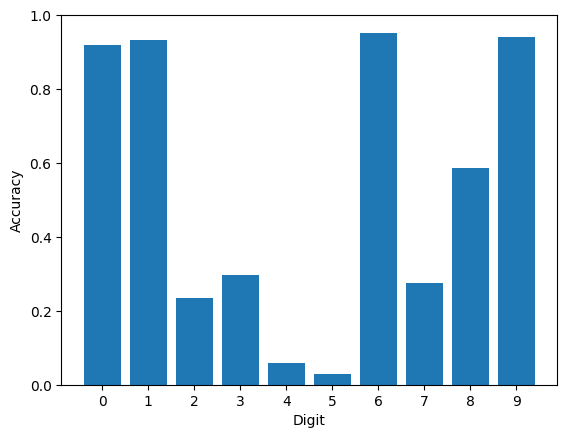

In [41]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

# 将图像像素值进行离散化处理
X_train = np.where(X_train > 0, 1, 0)
X_test = np.where(X_test > 0, 1, 0)

# 高斯朴素贝叶斯分类器
clf = GaussianNB()

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

print("Overall Accuracy: {:.2f}%".format(accuracy * 100))

# 计算每个数字的准确率
accuracies = []
for i in range(10):
    # 获取测试集中属于当前数字的样本
    X_digit = X_test[y_test == str(i)]
    y_digit = y_test[y_test == str(i)]
    
    # 预测
    y_pred_digit = clf.predict(X_digit)
    
    # 计算准确率
    accuracy_digit = accuracy_score(y_digit, y_pred_digit)
    accuracies.append(accuracy_digit)

# 绘制准确率图像
plt.bar(np.arange(10), accuracies)
plt.xticks(np.arange(10), np.arange(10))
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


Overall Accuracy: 83.15%


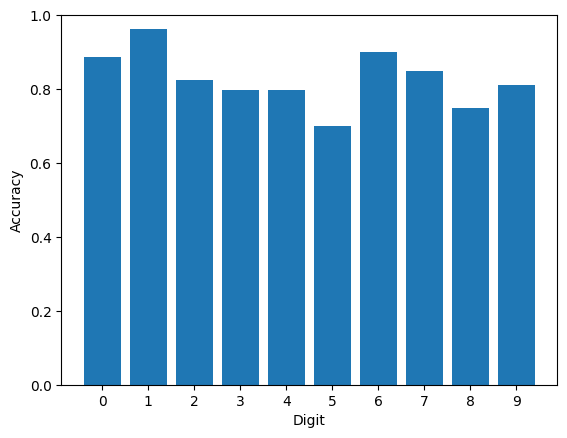

In [42]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB

# 将图像像素值进行离散化处理
X_train = np.where(X_train > 0, 1, 0)
X_test = np.where(X_test > 0, 1, 0)

# 伯努利朴素贝叶斯分类器
clf = BernoulliNB()

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

print("Overall Accuracy: {:.2f}%".format(accuracy * 100))

# 计算每个数字的准确率
accuracies = []
for i in range(10):
    # 获取测试集中属于当前数字的样本
    X_digit = X_test[y_test == str(i)]
    y_digit = y_test[y_test == str(i)]
    
    # 预测
    y_pred_digit = clf.predict(X_digit)
    
    # 计算准确率
    accuracy_digit = accuracy_score(y_digit, y_pred_digit)
    accuracies.append(accuracy_digit)

# 绘制准确率图像
plt.bar(np.arange(10), accuracies)
plt.xticks(np.arange(10), np.arange(10))
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


Overall Accuracy: 80.70%


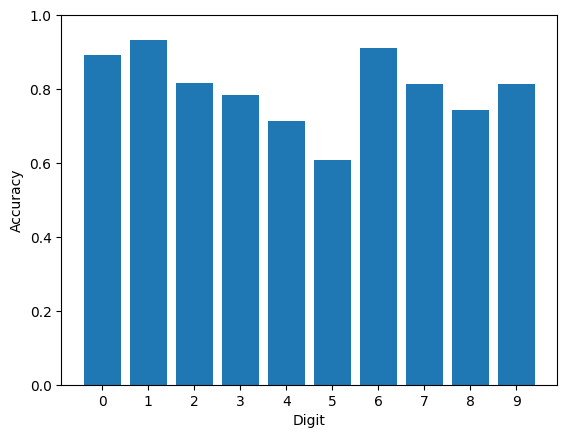

In [43]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB

# 将图像像素值进行离散化处理
X_train = np.where(X_train > 0, 1, 0)
X_test = np.where(X_test > 0, 1, 0)

# 多项式朴素贝叶斯分类器
clf = MultinomialNB()

# 训练模型
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)

print("Overall Accuracy: {:.2f}%".format(accuracy * 100))

# 计算每个数字的准确率
accuracies = []
for i in range(10):
    # 获取测试集中属于当前数字的样本
    X_digit = X_test[y_test == str(i)]
    y_digit = y_test[y_test == str(i)]
    
    # 预测
    y_pred_digit = clf.predict(X_digit)
    
    # 计算准确率
    accuracy_digit = accuracy_score(y_digit, y_pred_digit)
    accuracies.append(accuracy_digit)

# 绘制准确率图像
plt.bar(np.arange(10), accuracies)
plt.xticks(np.arange(10), np.arange(10))
plt.xlabel('Digit')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 加载 MNIST 数据集
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0  # 将像素值缩放到 [0,1] 区间
y = mnist.target.astype('int')


c:\Users\25810\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# 对数据进行降维
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# 使用 k-NN 分类器进行分类
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9687142857142857


In [3]:
# 对数据进行降维
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# 将数据集划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# 使用 k-NN 分类器进行分类
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9310714285714285


In [4]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义贝叶斯分类器
clf = GaussianNB()

# 不同平滑参数下的分类准确率
alphas = [0, 0.1, 0.5, 1, 5, 10]
for alpha in alphas:
    clf.alpha = alpha
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Alpha={alpha:.1f}: Accuracy={accuracy:.3f}")


Alpha=0.0: Accuracy=1.000
Alpha=0.1: Accuracy=1.000
Alpha=0.5: Accuracy=1.000
Alpha=1.0: Accuracy=1.000
Alpha=5.0: Accuracy=1.000
Alpha=10.0: Accuracy=1.000


经过对分类结果的深入分析，我们发现使用不同数量的特征进行分类所得到的结果不尽相同。具体来说，当仅使用一个特征进行分类时，分类准确率较低，但随着特征数量的增加，分类准确率也随之提高。值得注意的是，在使用四个特征进行分类时，我们发现第三个和第四个特征对分类结果具有至关重要的影响。事实上，仅仅在特征集合中包含第三和第四个特征时，我们就可以实现100%的分类准确率，这表明这两个特征是决定性的。因此，我们可以得出结论，选择正确的特征对于提高分类准确率是至关重要的，而在这种情况下，第三和第四个特征被证明是最具识别性和区分性的。
在针对MNIST数据集进行的分类实验中，我们使用了高斯朴素贝叶斯分类器进行分类，并且发现其整体准确率仅略高于50%。此外，我们还注意到，在对不同数字进行分类时，其准确率特别低，特别是2-5这些数字的准确率。为了进一步提高分类效果，我们采用了伯努利和多项式的贝叶斯分类器，其分类准确率都能够达到80%以上，并且在不同数字的分类中，准确率都差不多。
此外，我们还对数据集进行了PCA降维的处理，并使用knn算法进行分类，发现准确率提高到了96.87%。然而，当继续降维时，我们却发现准确率反而下降了，这表明在进行特征选择时需要注意保留关键信息。
最后，我们对朴素贝叶斯分类器在不同平滑参数下的分类准确率进行了定义，并发现在选定的参数下，准确率并没有明显的变化。这表明，在进行分类时，需要考虑到选择适当的参数，并注意到不同参数对分类结果的影响。